In [125]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import pyperclip
import pprint
import re
import warnings 
warnings.filterwarnings('ignore')

In [18]:
url = requests.get("https://poslovi.infostud.com/oglasi-za-posao-data-analyst/beograd?scope=full")

In [19]:
soup = bs(url.content, "html.parser")

In [74]:
# Tehnicki zahtevi sa sajta Infostud za kljucnu rec: "Analyst"

analyst = soup.find_all('span', class_=["__jobtag preview uk-badge job__it_tag","__jobtag full uk-badge job__it_tag"])

In [75]:
rez = []
for x in analyst:
    rez.append(x.string)

In [100]:
# Pretvaranje python liste u Pd.Series objekat kako bi moglo lakse da se radi sa njim

serija = pd.Series(rez) 

In [84]:
# Tehnicki zahtevi sa sajta Infostud za kljucnu rec: "Data"

page = 1
podaci = []
while page <= 10:
    url_d = f"https://poslovi.infostud.com/oglasi-za-posao-data/beograd?scope=srpoz&page={page}"
    response_d = requests.get(url_d)
    html = response_d.content
    soup_d = bs(html, "lxml")
    for i in soup_d.find_all('span', class_=["__jobtag preview uk-badge job__it_tag","__jobtag full uk-badge job__it_tag"]):
        podaci.append(i.get_text(strip=True))
    page = page + 1

In [98]:
serija2 = pd.Series(podaci)

In [102]:
serija2.value_counts().head(10)

Programiranje               69
SQL                         40
Python                      35
Java                        35
Sistemska administracija    33
Git                         30
Prodaja / konsultanti       28
Menadžment                  26
Senior                      24
SAP                         24
dtype: int64

In [126]:
ukupno = serija.append(serija2)

In [154]:
viz = ukupno.value_counts().head(15)

<AxesSubplot:>

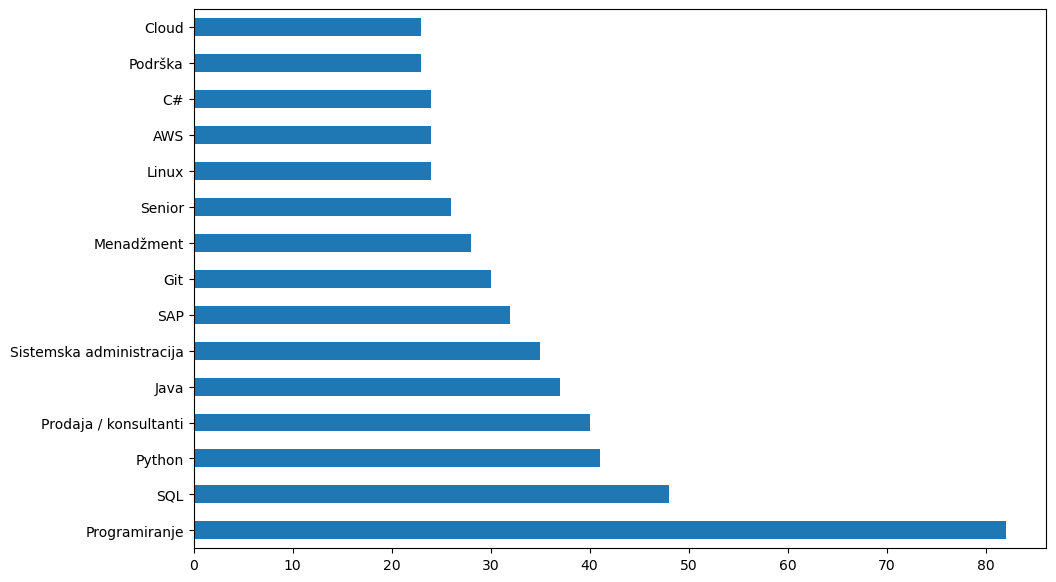

In [155]:
viz.plot(kind='barh',figsize=(11,7))